# MODEL EVALUATION

## REVIEW OF THE LAST CLASS

- Goal was to predict the species of an **unknown iris**
- Made predictions using KNN models with **different values of K**
- Need a way to choose the **"best" model**: the one that "generalizes" to "out-of-sample" data

**SOLUTION:** Create a procedure that **estimates** how well a model is likely to perform on out-of-sample data and use that to choose between models.

## EVALUATION PROCEDURE #1: TRAIN AND TEST ON THE ENTIRE DATASET

1. Train the model on the **entire dataset**.
2. Test the model on the **same dataset**, and evaluate how well we did by comparing the **predicted** response values with the **true** response values.

In [1]:
# read the iris data into a DataFrame
import pandas as pd
import numpy as np

url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
col_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']
iris = pd.read_csv(url, header=None, names=col_names)

In [2]:
# map each iris species to a number
iris['species_num'] = iris.species.map({'Iris-setosa':0, 'Iris-versicolor':1, 'Iris-virginica':2})

In [3]:
# store feature matrix in "X"
feature_cols = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
X = iris[feature_cols]

In [4]:
# store response vector in "y"
y = iris.species_num

### KNN (K=50)

In [5]:
# import the class
from sklearn.neighbors import KNeighborsClassifier

# instantiate the model
knn = KNeighborsClassifier(n_neighbors=50)

# train the model on the entire dataset
knn.fit(X, y)

# predict the response values for the observations in X ("test the model")
knn.predict(X)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2,
       2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [6]:
# store the predicted response values
y_pred = knn.predict(X)

## EVALUATION METRIC

To evaluate a model, we also need an **evaluation metric:**

- Numeric calculation used to **quantify** the performance of a model
- Appropriate metric depends on the **goals** of your problem

Most common choices for classification problems:

- **Classification accuracy**: percentage of correct predictions (reward function)
- **Classification error**: percentage of incorrect predictions (loss function)

In this case, we'll use classification accuracy.

In [7]:
# compute classification accuracy
from sklearn import metrics
print (metrics.accuracy_score(y, y_pred))

0.94


This is known as **training accuracy** because we are testing the model on the same data we used to train the model.

### KNN (K=1)

In [8]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X, y)
y_pred = knn.predict(X)
print (metrics.accuracy_score(y, y_pred))

1.0


Does that mean that K=1 is the best value for K?

### PROBLEM WITH TRAINING AND TESTING ON THE SAME DATA

- Goal is to estimate likely performance of a model on **out-of-sample data**
- But, maximizing training accuracy rewards **overly complex models** that won't necessarily generalize
- Unnecessarily complex models **overfit** the training data:
    - Will do well when tested using the in-sample data
    - May do poorly on out-of-sample data
    - Learns the "noise" in the data rather than the "signal"
    - From Quora: [What is an intuitive explanation of overfitting?](http://www.quora.com/What-is-an-intuitive-explanation-of-overfitting/answer/Jessica-Su)

**Thus, training accuracy is not a good estimate of out-of-sample accuracy.**

## EVALUATION PROCEDURE #2: TRAIN/TEST SPLIT

#### STEPS

1. Split the dataset into two pieces: a **training set** and a **testing set**.
2. Train the model on the **training set**.
3. Test the model on the **testing set**, and evaluate how well we did.

#### WHAT DOES THIS ACCOMPLISH?

- Model can be trained and tested on **different data** (we treat testing data like out-of-sample data).
- Response values are **known** for the testing set, and thus **predictions can be evaluated**.
- **Testing accuracy** is a better estimate than training accuracy of out-of-sample performance.

### UNDERSTANDING THE `train_test_split` FUNCTION

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4)

In [10]:
# before splitting
print (X.shape)

# after splitting
print (X_train.shape)
print (X_test.shape)

(150, 4)
(90, 4)
(60, 4)


In [11]:
# before splitting
print (y.shape)

# after splitting
print (y_train.shape)
print (y_test.shape)

(150,)
(90,)
(60,)


In [12]:
X_train

,sepal_length,sepal_width,petal_length,petal_width
94,5.6,2.7,4.2,1.3
77,6.7,3.0,5.0,1.7
108,6.7,2.5,5.8,1.8
95,5.7,3.0,4.2,1.2
103,6.3,2.9,5.6,1.8
105,7.6,3.0,6.6,2.1
31,5.4,3.4,1.5,0.4
137,6.4,3.1,5.5,1.8
21,5.1,3.7,1.5,0.4
84,5.4,3.0,4.5,1.5


In [13]:
y_train

94     1
77     1
108    2
95     1
103    2
105    2
31     0
137    2
21     0
84     1
71     1
57     1
20     0
1      0
7      0
55     1
102    2
68     1
5      0
10     0
17     0
135    2
101    2
76     1
110    2
124    2
42     0
33     0
49     0
126    2
      ..
120    2
27     0
12     0
60     1
73     1
146    2
41     0
51     1
136    2
128    2
133    2
18     0
118    2
74     1
99     1
52     1
91     1
100    2
113    2
69     1
134    2
104    2
90     1
11     0
28     0
34     0
130    2
119    2
30     0
36     0
Name: species_num, Length: 90, dtype: int64

![train_test_split](images/train_test_split.png)

### UNDERSTANDING THE `random_state` PARAMETER

In [14]:
# WITHOUT a random_state parameter
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4)

# print the first element of each object
print (X_train[:1])
print (X_test[:1])
print (y_train[:1])
print (y_test[:1])

    sepal_length  sepal_width  petal_length  petal_width
20           5.4          3.4           1.7          0.2
    sepal_length  sepal_width  petal_length  petal_width
52           6.9          3.1           4.9          1.5
20    0
Name: species_num, dtype: int64
52    1
Name: species_num, dtype: int64


In [15]:
# WITH a random_state parameter
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=4)

# print the first element of each object
print (X_train[:1])
print (X_test[:1])
print (y_train[:1])
print (y_test[:1])

   sepal_length  sepal_width  petal_length  petal_width
6           4.6          3.4           1.4          0.3
     sepal_length  sepal_width  petal_length  petal_width
128           6.4          2.8           5.6          2.1
6    0
Name: species_num, dtype: int64
128    2
Name: species_num, dtype: int64


## USING THE TRAIN/TEST SPLIT PROCEDURE 
### START WITH K=1

In [16]:
# STEP 1: split X and y into training and testing sets (using random_state for reproducibility)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=4)

In [17]:
# STEP 2: train the model on the training set (using K=1)
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=1, p=2,
           weights='uniform')

In [18]:
# STEP 3: test the model on the testing set, and check the accuracy
y_pred = knn.predict(X_test)
print (metrics.accuracy_score(y_test, y_pred))

0.95


### REPEAT FOR K=50

In [19]:
knn = KNeighborsClassifier(n_neighbors=50)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print (metrics.accuracy_score(y_test, y_pred))

0.9333333333333333


![Bias-variance tradeoff](images/bias_variance.png)

### SEARCH FOR THE "BEST" VALUE OF K

In [20]:
# calculate TRAINING ERROR and TESTING ERROR for K=1 through 50
k_range = range(1, 51)
training_error = []
testing_error = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    # training error
    knn.fit(X, y)
    y_pred = knn.predict(X)
    training_error.append(1 - metrics.accuracy_score(y, y_pred))
    # testing error
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    testing_error.append(1 - metrics.accuracy_score(y_test, y_pred))

In [21]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('ggplot')

Text(0, 0.5, 'Testing Error')

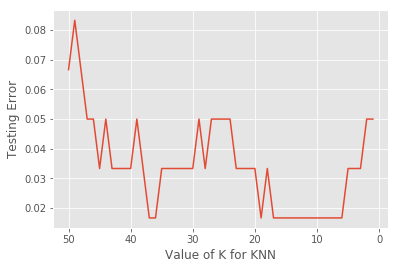

In [22]:
# plot the relationship between K (HIGH TO LOW) and TESTING ERROR
plt.plot(k_range, testing_error)
plt.gca().invert_xaxis()
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Error')

### WHAT CAN WE CONCLUDE?

- A value of K around 11 is likely the **best value for K** when using KNN on the iris dataset.
- When given the measurements of an **unknown iris**, we estimate that we would be able to correctly predict its species 98% of the time.

### TRAINING ERROR Vs TESTING ERROR

In [23]:
# create a DataFrame of K, training error, and testing error
df = pd.DataFrame({'K': k_range, 'train':training_error, 'test':testing_error}).set_index('K').sort_index(ascending=False)
df

,train,test
K,,
50,0.060000,0.066667
49,0.040000,0.083333
48,0.053333,0.066667
47,0.046667,0.050000
46,0.053333,0.050000
45,0.053333,0.033333
44,0.046667,0.050000
43,0.053333,0.033333
42,0.046667,0.033333


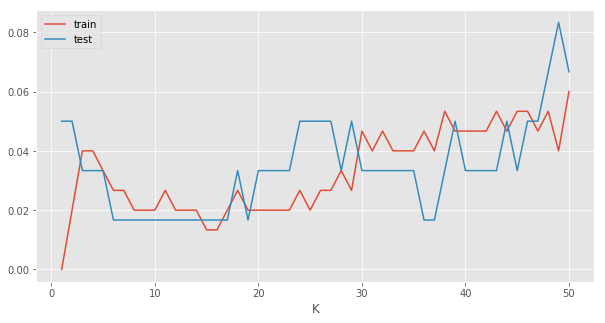

In [24]:
# plot the relationship between K (HIGH TO LOW) and both TRAINING ERROR and TESTING ERROR
df.plot(figsize=(10,5))

### ROUGHLY SPEAKING:

- **Training error** decreases as model complexity increases (lower value of K)
- **Testing error** is minimized at the optimum model complexity

## MAKING PREDICTION ON OUT-OF-SAMPLE DATA

#### Given the measurements of a (truly) unknown iris, how do we predict its species?

In [25]:
# instantiate the model with the best known parameters
knn = KNeighborsClassifier(n_neighbors=11)

# re-train the model with X and y (not X_train and y_train) - why?
knn.fit(X, y)

# make a prediction for an out-of-sample observation
flower_dimensions = np.array([3, 5, 4, 2])
knn.predict(flower_dimensions.reshape(1, -1))

array([1])

## DISADVANTAGES OF TRAIN/TEST SPLIT

####  What would happen if the `train_test_split` function had split the data differently? Would we get the same exact results as before?

In [26]:
# try different values for random_state
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=78978)
knn = KNeighborsClassifier(n_neighbors=11)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print (metrics.accuracy_score(y_test, y_pred))

1.0


In [27]:
# try different values for random_state
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=78978)
knn = KNeighborsClassifier(n_neighbors=11)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print (metrics.accuracy_score(y_test, y_pred))

1.0


- Testing accuracy is a **high-variance estimate** of out-of-sample accuracy
- **K-fold cross-validation** overcomes this limitation and provides more reliable estimates
- But, train/test split is still useful because of its **flexibility and speed**

In [29]:
i = 0
while True:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=i)
    knn = KNeighborsClassifier(n_neighbors=11)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
#    if ()
print (metrics.accuracy_score(y_test, y_pred))

KeyboardInterrupt: 